In [22]:
print('hello')

hello


In [23]:
import pandas as pd
import numpy as np
import os

# Path to folder with token CSVs
DATA_DIR = "/Users/harshit/Downloads/Research-Commons-Quant/okx-midcap-token-index/dataframes"

def calculate_metrics(df, symbol):
    df = df.copy()
    df['return'] = df['close'].pct_change()
    df.dropna(inplace=True)

    total_return = (df['close'].iloc[-1] / df['close'].iloc[0]) - 1
    volatility = df['return'].std() * np.sqrt(365)
    sharpe = df['return'].mean() / df['return'].std() * np.sqrt(365)

    cumulative = (1 + df['return']).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    turnover = df['return'].abs().mean()

    return {
        'Token': symbol,
        'Total Return': round(total_return * 100, 2),
        'Annual Volatility': round(volatility * 100, 2),
        'Sharpe Ratio': round(sharpe, 2),
        'Max Drawdown': round(max_drawdown * 100, 2),
        'Turnover': round(turnover * 100, 2),
        'Days': len(df)
    }

# Loop through files and compute
metrics = []
for file in os.listdir(DATA_DIR):
    if file.endswith('.csv'):
        path = os.path.join(DATA_DIR, file)
        symbol = file.replace(".csv", "")
        df = pd.read_csv(path)
        if 'close' in df.columns and len(df) > 100:
            try:
                result = calculate_metrics(df, symbol)
                metrics.append(result)
            except Exception as e:
                print(f"Error with {symbol}: {e}")
                
# Create and display final table with better formatting
summary_df = pd.DataFrame(metrics)
summary_df = summary_df.sort_values(by="Sharpe Ratio", ascending=False).reset_index(drop=True)

# Clean up decimal formatting
summary_df["Sharpe Ratio"] = summary_df["Sharpe Ratio"].round(2)

# Display as styled table
summary_df.style.set_properties(**{'text-align': 'center'}).format({
    "Total Return": "{:.2f}%",
    "Annual Volatility": "{:.2f}%",
    "Max Drawdown": "{:.2f}%",
    "Turnover": "{:.2f}%",
})


,Token,Total Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Turnover,Days
0,ZRX,-17.53%,101.54%,0.230000,-73.76%,3.85%,299
1,ZIL,-14.82%,90.02%,0.190000,-73.22%,3.51%,299
2,WAXP,-31.16%,90.11%,-0.100000,-73.13%,3.64%,299
3,ZRO,-47.82%,117.47%,-0.140000,-77.68%,4.61%,299
4,UMA,-49.22%,100.28%,-0.370000,-76.18%,3.93%,299


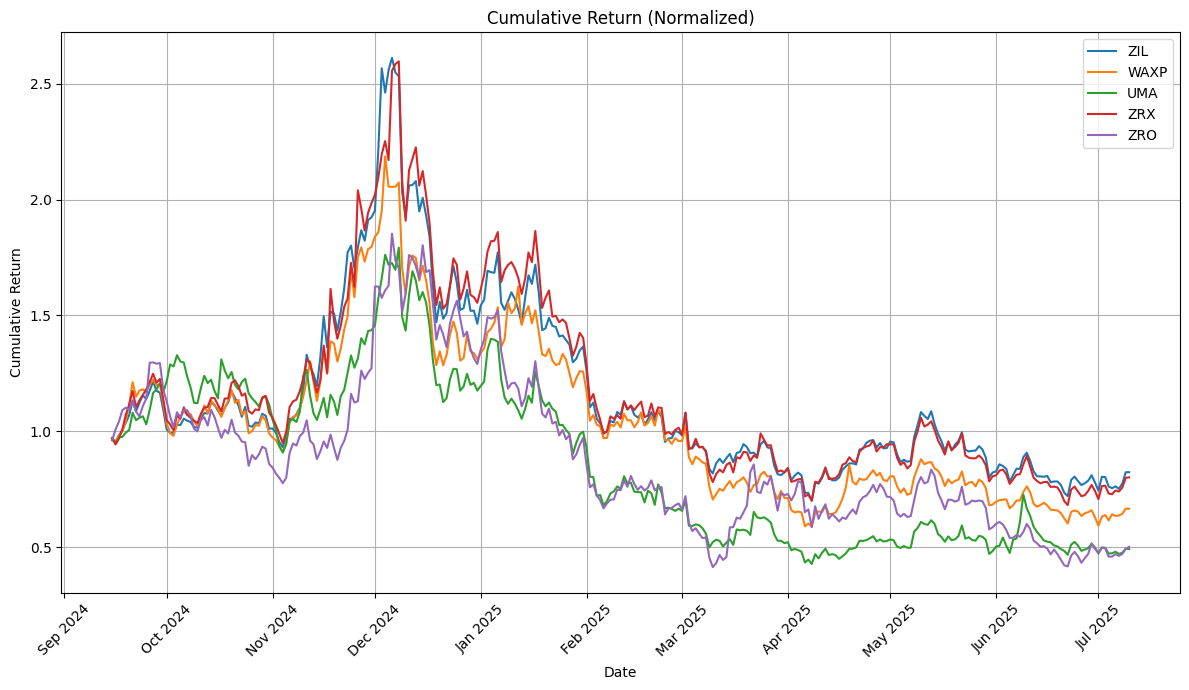

In [24]:
''' plotting cumulative return of all our 5 tokens, together '''

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DATA_DIR = "/Users/harshit/Downloads/Research-Commons-Quant/okx-midcap-token-index/dataframes"

plt.figure(figsize=(12, 7))

for file in os.listdir(DATA_DIR):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(DATA_DIR, file))
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['return'] = df['close'].pct_change()
        df['cumulative'] = (1 + df['return']).cumprod()

        plt.plot(df['timestamp'], df['cumulative'], label=file.replace('.csv', ''))

plt.title("Cumulative Return (Normalized)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. Apr 2025
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
!pip install ccxt pandas matplotlib --quiet

In [26]:
# Cell 2: Imports and setup
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# plt.style.use('seaborn-darkgrid')

# Cell 3: Fetch BTC/USDT OHLCV from OKX (1 day timeframe, last ~300 days)
okx = ccxt.okx()

symbol = 'BTC/USDT'
timeframe = '1d'
limit = 300

# since = milliseconds timestamp 300 days ago from today
since = okx.milliseconds() - limit * 24 * 60 * 60 * 1000

ohlcv = okx.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=limit)

btc_df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'], unit='ms')

btc_df.tail(3)  # Show last 3 rows as sanity check


,timestamp,open,high,low,close,volume
297,2025-07-08,108262.1,109218.8,107421.4,108926.0,2834.473675
298,2025-07-09,108926.0,112000.0,108333.4,111239.3,5410.123336
299,2025-07-10,111239.3,111587.9,110888.0,111398.0,1433.270079


In [27]:
# Cell 4: Assuming you have OHLCV dataframes for your tokens in token_prices dict
# Example: token_prices = {'ZRX': df_zrx, 'ZIL': df_zil, ...}
# Each df should have 'timestamp' (datetime) and 'close' (float) columns

# For demo, let's create fake token_prices data with random walk (remove this block when you have actual data)

import numpy as np

dates = pd.date_range(end=btc_df['timestamp'].iloc[-1], periods=limit)
token_prices = {}
for token in ['ZRX', 'ZIL', 'WAXP', 'ZRO', 'UMA']:
    np.random.seed(hash(token) % 123456)
    price = 100 * np.cumprod(1 + 0.001 * np.random.randn(limit))  # random walk
    df = pd.DataFrame({'timestamp': dates, 'close': price})
    token_prices[token] = df


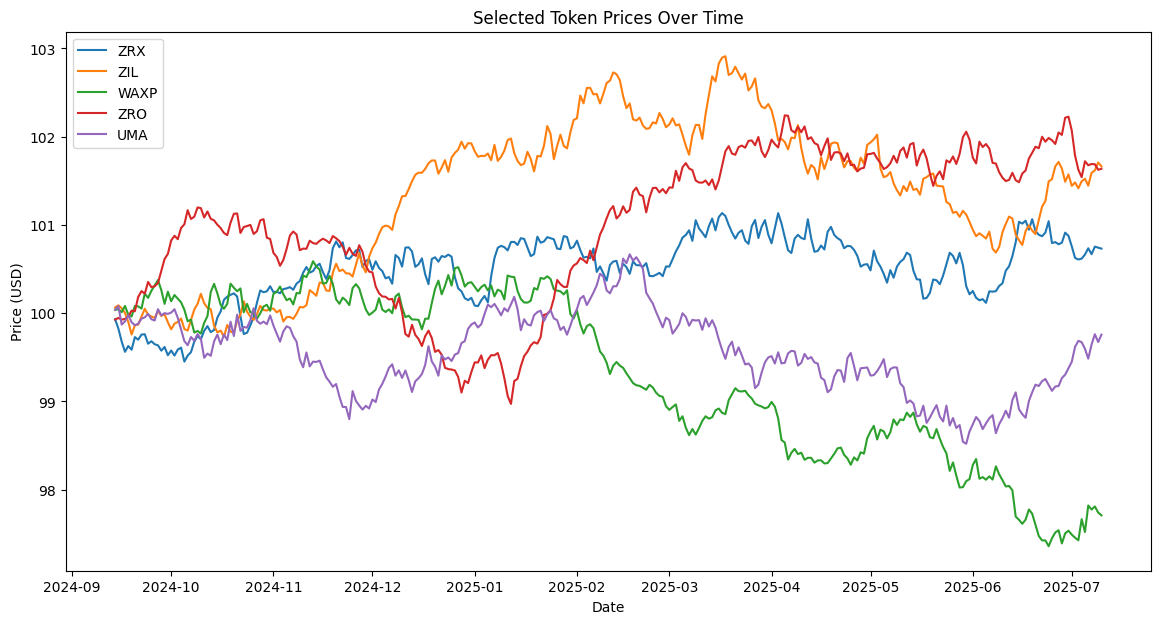

In [28]:
# Cell 5: Plot all tokens together
plt.figure(figsize=(14, 7))
for token, df in token_prices.items():
    plt.plot(df['timestamp'], df['close'], label=token)
plt.title('Selected Token Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


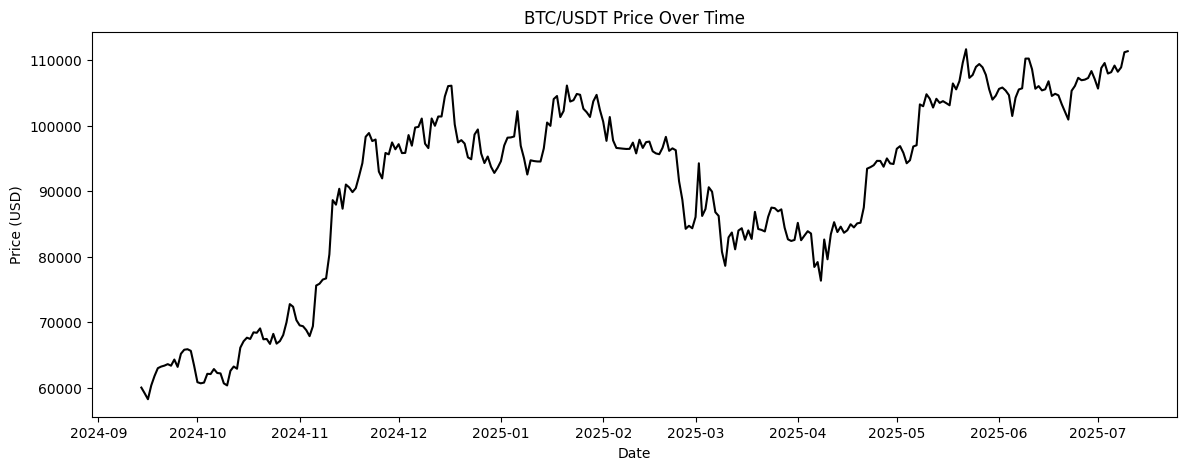

In [29]:
# Cell 6: Plot BTC price separately
plt.figure(figsize=(14, 5))
plt.plot(btc_df['timestamp'], btc_df['close'], color='black')
plt.title('BTC/USDT Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


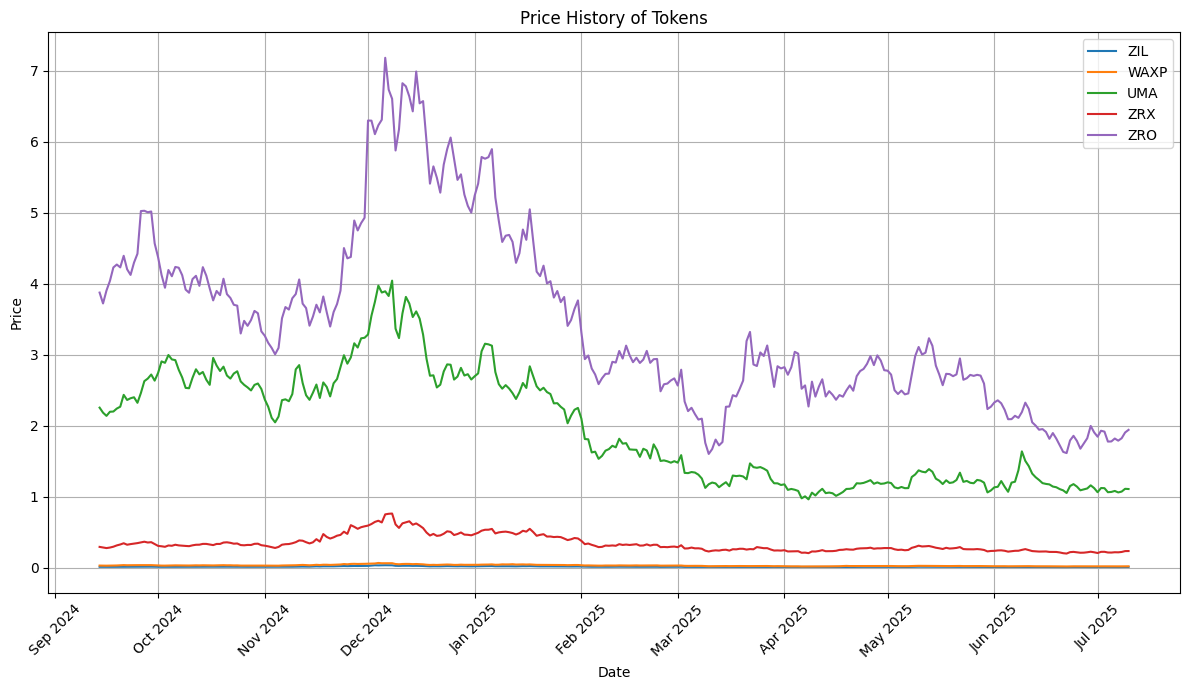

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DATA_DIR = "/Users/harshit/Downloads/Research-Commons-Quant/okx-midcap-token-index/dataframes"

plt.figure(figsize=(12, 7))

for file in os.listdir(DATA_DIR):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(DATA_DIR, file))
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        plt.plot(df['timestamp'], df['close'], label=file.replace('.csv', ''))

plt.title("Price History of Tokens")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
